<a href="https://colab.research.google.com/github/Promiz10/Market-Segmentation/blob/main/Market_Segmenation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Segmentation

In marketing, market segmentation is the process of dividing a broad consumer or business market, normally consisting of existing or potential customers, into subgroups of consumers based on some type of shared characteristics.


### Objective
This case requires developing a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customer groups.

### Dataset

The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The dataset consists of 18 behavioral variables.
- Customer ID: Unique identifier for each customer.
- Balance: The outstanding balance amount on the credit card.
- Balance Frequency: Frequency of updating the balance.
- Purchases: Total amount of purchases made using the credit card.
- One-off Purchases: Amount spent on one-time purchases using the credit card.
- Installment Purchases: Amount spent on purchases made in installments.
- Cash Advance: Total amount of cash advances taken using the credit card.
- Purchases Frequency: Frequency of making purchases using the credit card
- One-off Purchases Frequency: Frequency of making one-time purchases.
- Purchases Installments Frequency: Frequency of making purchases in installments.
- Cash Advance Frequency: Frequency of taking cash advances.
- Cash Advance TRX: Number of cash advance transactions.
- Purchases TRX: Number of purchase transactions.
- Credit Limit: The maximum amount that can be charged on the credit card.
- Payments: Total amount of payments made by the customer.
- Minimum Payments: The minimum amount required to be paid by the customer.
- PRC Full payment: Percentage of the full credit card payment paid by the customer.
- Tenure: The duration for which the customer has held the credit card (in months).


### Import Libraries

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline

### Import Datset

In [5]:
path = '/content/sample_data/datasets/Customer Data.csv'
df = pd.read_csv(path)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
#Check missing values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

The number of missing values are small and wont affect the dataset signiicantly, so we dop missing values

In [9]:
#Drop missing values
data = df.dropna()

### Exploratory Data Analysis

In [10]:
#Check for categorical column
data.nunique()

CUST_ID                             8636
BALANCE                             8631
BALANCE_FREQUENCY                     42
PURCHASES                           6015
ONEOFF_PURCHASES                    3922
INSTALLMENTS_PURCHASES              4341
CASH_ADVANCE                        4206
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         203
PAYMENTS                            8636
MINIMUM_PAYMENTS                    8635
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

Text(0.5, 1.0, 'Balance Distribution')

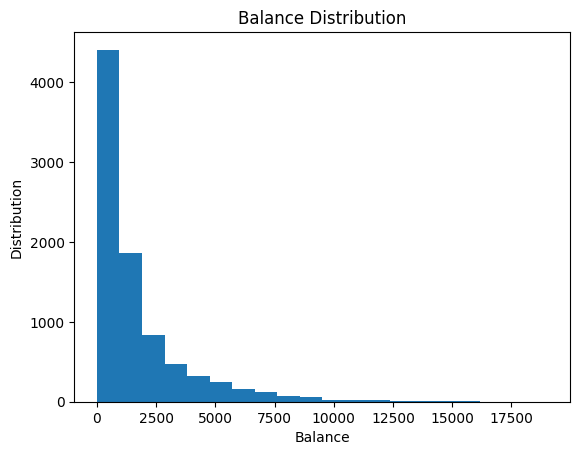

In [11]:
#Balance distribution
data['BALANCE'].hist(bins=20, grid=False)
plt.xlabel('Balance')
plt.ylabel('Distribution')
plt.title('Balance Distribution')

Text(0.5, 1.0, 'Relationship between balance and credit limit')

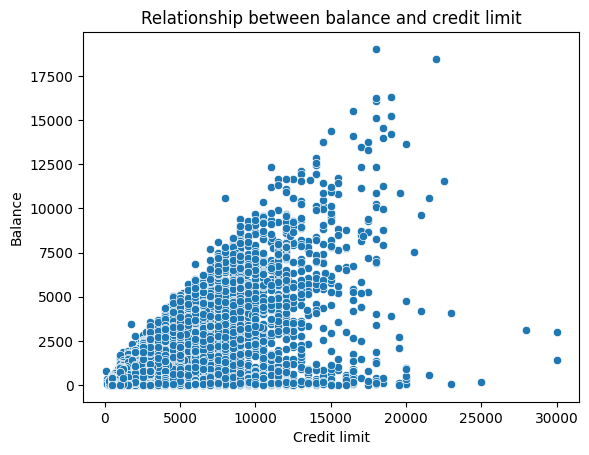

In [12]:
#Relationship between balance and credit limit
sns.scatterplot(x=data['CREDIT_LIMIT'], y=data['BALANCE'])
plt.xlabel('Credit limit')
plt.ylabel('Balance')
plt.title('Relationship between balance and credit limit')

From the chart above, customers with high balance tend to have credit limit.

Text(0.5, 1.0, 'Relationship between purchases and credit limit')

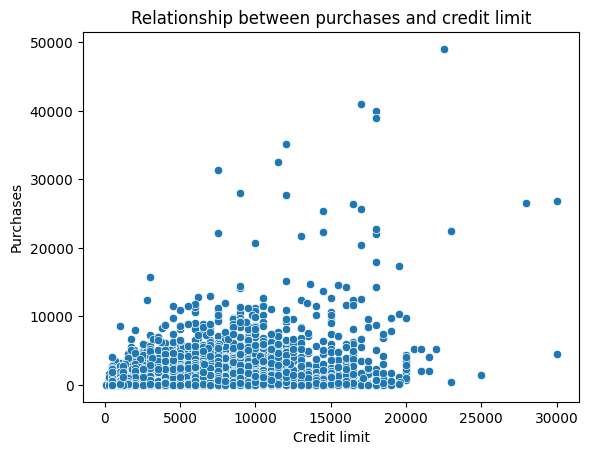

In [13]:
sns.scatterplot(x=data['CREDIT_LIMIT'], y=data['PURCHASES'])
plt.xlabel('Credit limit')
plt.ylabel('Purchases')
plt.title('Relationship between purchases and credit limit')

Also, customers with high numer of purchases tend to also have higher credit limit

Text(0.5, 1.0, 'Relationship between Tenure and credit limit')

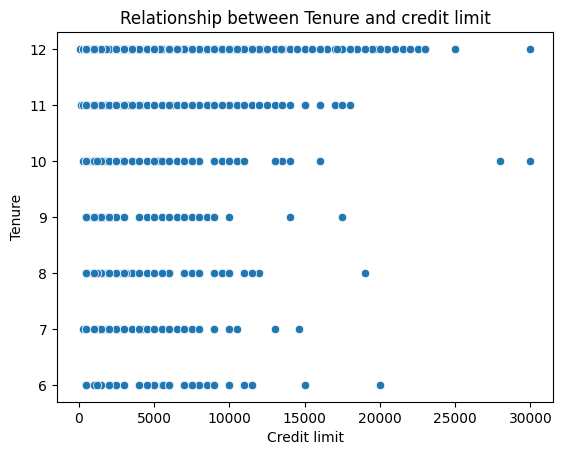

In [14]:
sns.scatterplot(x=data['CREDIT_LIMIT'], y=data['TENURE'])
plt.xlabel('Credit limit')
plt.ylabel('Tenure')
plt.title('Relationship between Tenure and credit limit')

<Axes: xlabel='TENURE'>

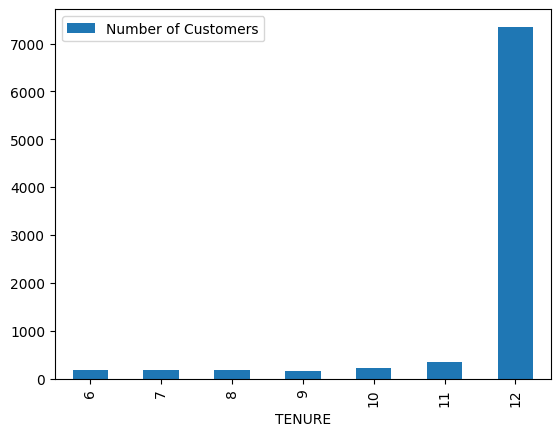

In [15]:
#Tenure of the customers
data.groupby('TENURE')['CUST_ID'].count().rename('Number of Customers').to_frame().plot(kind='bar')

Most of the customers have been associated with the credit card company for at least 12 Months

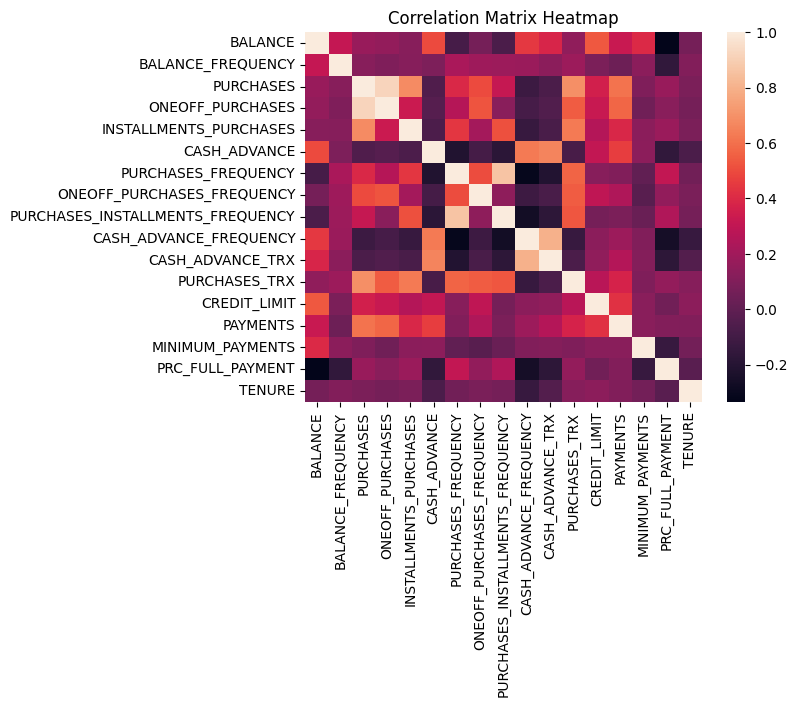

In [16]:
#Correlation
data = data.drop(columns='CUST_ID')
corr = data.corr()

sns.heatmap(corr)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:
# Pairwise maximal correlations
for x in range(len(data.columns)):
    corr.iloc[x,x] = 0.0

corr.abs().idxmax()

BALANCE                                                 CREDIT_LIMIT
BALANCE_FREQUENCY                                            BALANCE
PURCHASES                                           ONEOFF_PURCHASES
ONEOFF_PURCHASES                                           PURCHASES
INSTALLMENTS_PURCHASES                                     PURCHASES
CASH_ADVANCE                                        CASH_ADVANCE_TRX
PURCHASES_FREQUENCY                 PURCHASES_INSTALLMENTS_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY                             PURCHASES_TRX
PURCHASES_INSTALLMENTS_FREQUENCY                 PURCHASES_FREQUENCY
CASH_ADVANCE_FREQUENCY                              CASH_ADVANCE_TRX
CASH_ADVANCE_TRX                              CASH_ADVANCE_FREQUENCY
PURCHASES_TRX                                              PURCHASES
CREDIT_LIMIT                                                 BALANCE
PAYMENTS                                                   PURCHASES
MINIMUM_PAYMENTS                  

### Feature Engineering

In [18]:
#Examine skew columns
skew_columns = (data
                .skew()
                .abs()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

MINIMUM_PAYMENTS              13.622193
ONEOFF_PURCHASES               9.935776
PURCHASES                      8.055789
INSTALLMENTS_PURCHASES         7.216133
PAYMENTS                       5.873049
CASH_ADVANCE_TRX               5.673327
CASH_ADVANCE                   5.139629
PURCHASES_TRX                  4.578418
TENURE                         3.011141
BALANCE                        2.374254
BALANCE_FREQUENCY              2.084161
PRC_FULL_PAYMENT               1.886027
CASH_ADVANCE_FREQUENCY         1.795915
CREDIT_LIMIT                   1.507019
ONEOFF_PURCHASES_FREQUENCY     1.504234
dtype: float64

In [19]:
# Perform log transform on skewed column
tr_data = data
for col in skew_columns.index.tolist():
    tr_data[col] = np.log1p(tr_data[col])
tr_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949
5,7.501540,0.693147,7.196147,0.000000,7.196147,0.000000,0.666667,0.000000,0.583333,0.000000,0.000000,2.197225,7.496097,7.244983,7.786654,0.000000,2.564949


In [20]:
features = ['PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']

In [21]:
X = tr_data[features]

## Build Model

Build model with 3 classifiers and tune parameters for each model. Then select the model with the best silhoute score.

#### KMeans

Find the optimum number of clusters using elbow method

In [22]:
from sklearn.metrics import silhouette_score
inertia = []
silhouette = []
list_num_clusters = list(range(2,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)
    labels = km.labels_
    silhouette.append(silhouette_score(X, labels))

score = {'clusters': list_num_clusters,
         'inertia': inertia,
         'silhouette': silhouette}
pd.DataFrame(score)

,clusters,inertia,silhouette
0,2,66838.193300,0.605686
1,3,25192.890069,0.685088
2,4,19673.321699,0.520481
3,5,16657.929877,0.466601
4,6,13853.037855,0.401112
5,7,12237.339185,0.402081
6,8,10694.148706,0.368785
7,9,9788.452192,0.372198
8,10,8966.190494,0.356035


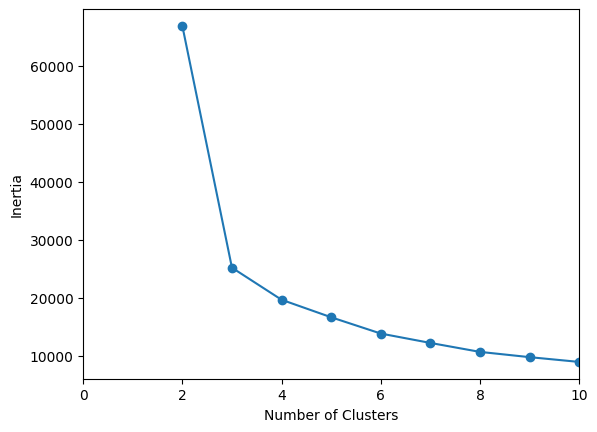

In [23]:
#plot inertia and n_clusters
plt.plot(list_num_clusters, inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlim(0, 10)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show();

From the silhouette score and inertia we can be that the optimal number of cluster is 3. So we train a final KMeans model using 3 clusters

In [24]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(X)

KMeans(n_clusters=3)

#### AgglomerativeClustering

In [25]:

silhouette = []
linkages = ['single', 'complete','average', 'ward']
for  linkage in linkages:
  agg = AgglomerativeClustering(n_clusters=3, linkage=linkage)
  agg.fit(X)
  labels = agg.labels_
  silhouette.append(silhouette_score(X, labels))

agg_score = {'linkage': linkages,
             'silhouette': silhouette}
pd.DataFrame(agg_score)

,linkage,silhouette
0,single,0.483064
1,complete,0.676454
2,average,0.682230
3,ward,0.682230


Thae 'average' linkage produces the best silhouette score, so our final AgglmerativeCluster will use 'average' as linkage

In [26]:
agg = AgglomerativeClustering(n_clusters=3, linkage='average')
agg.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=3)

#### Mean Shift

In [27]:
#estimate bandwidth
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(X)
bandwidth

3.944471883172224

In [28]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=3.944471883172224, bin_seeding=True)

In [29]:
label = ms.labels_
silhouette_score(X, label)

0.6850878711848986

From the trained models, the best models are Mean SHift and KMeans with approx. 0.68 Silhouette score. We will plot a chart to visualize the characteristics of each cluster.

### Communicate Results

In [36]:
#group each cluster
labels = kmeans_model.labels_
X_group = X.groupby(labels).mean()
X_group

,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT
0,0.038636,6.858967,7.991469
1,6.410853,0.018097,8.073548
2,6.383298,6.944183,8.251987


In [31]:
#Visualize each group
import plotly.express as px
fig = px.bar(X_group, barmode="group", title="Customer Segmentation by Cluster")
fig.update_layout(xaxis_title="Clusters")

fig.show()

**Observation:**

*   Cluster 0: Customers that makes alot of purchase and barely take cash advance.
*   Cluster 1: Customers take alot of cash advance using their credit cards and do not make alot of puurchase.
*   Cluster 2: Customers with high number of purchases and take alot of cash advance using their credit cards.

Using this segmentation of customers recommendations like saving plans, loans and wealth management can be made.






In [32]:
#Using dimension reduction to visualize the customer segments
from sklearn.decomposition import PCA

pca = PCA(n_components = 2,random_state=42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns=["PC1", "PC2"])
X_pca.head()

,PC1,PC2
0,-2.580151,-2.302924
1,7.252159,-0.958117
2,-3.738114,-0.331020
3,-1.610548,-3.707617
4,-4.046006,-0.065508


Text(0.5, 1.0, 'PCA Representation of clusters')

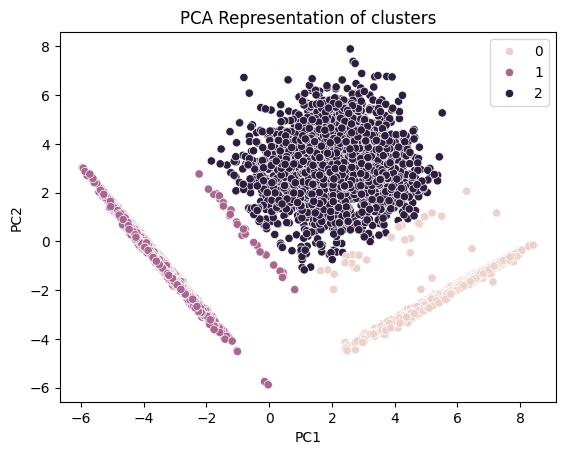

In [33]:
sns.scatterplot(x=X_pca['PC1'], y=X_pca['PC2'], hue=labels)
plt.title('PCA Representation of clusters')